<a href="https://colab.research.google.com/github/balpr/leafication/blob/main/neural_network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Download dataset
!wget --no-check-certificate \
    https://download1079.mediafire.com/xedtc7egx8bg/x69um540rnsaiwl/daun_herbal.zip \
    -O /tmp/daunherbal.zip

--2021-11-14 13:03:14--  https://download1079.mediafire.com/xedtc7egx8bg/x69um540rnsaiwl/daun_herbal.zip
Resolving download1079.mediafire.com (download1079.mediafire.com)... 205.196.122.20
Connecting to download1079.mediafire.com (download1079.mediafire.com)|205.196.122.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15878513 (15M) [application/zip]
Saving to: ‘/tmp/daunherbal.zip’

/tmp/daunherbal.zip 100%[===================>]  15.14M  9.43MB/s    in 1.6s    

2021-11-14 13:03:16 (9.43 MB/s) - ‘/tmp/daunherbal.zip’ saved [15878513/15878513]



In [41]:
import os
import zipfile

local_zip = '/tmp/daunherbal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [42]:
base_dir = '/tmp/daun_herbal'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_jeruknipis_dir = os.path.join(train_dir, 'jeruk_nipis')
train_belimbing_wuluh_dir = os.path.join(train_dir, 'belimbing_wuluh')

validation_jeruk_nipis_dir = os.path.join(validation_dir, 'jeruk_nipis')
validation_belimbing_wuluh_dir = os.path.join(validation_dir, 'belimbing_wuluh')

In [43]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_jeruknipis_dir)[:10])
print(os.listdir(train_belimbing_wuluh_dir)[:10])

['018.jpg', '026.jpg', '013.jpg', '037.jpg', '038.jpg', '029.jpg', '028.jpg', '015.jpg', '030.jpg', '020.jpg']
['067.JPG', '057.JPG', '065.JPG', '060.JPG', '087.JPG', '089.JPG', '063.JPG', '053.JPG', '062.JPG', '061.JPG']


In [45]:
# Cek jumlah data train dan data validation
print('total training jeruk_nipis images:', len(os.listdir(train_jeruknipis_dir)))
print('total training belimbing_wuluh images:', len(os.listdir(train_belimbing_wuluh_dir)))
print('total validation jeruk_nipis images:', len(os.listdir(validation_jeruk_nipis_dir)))
print('total validation belimbing_wuluh images:', len(os.listdir(validation_belimbing_wuluh_dir)))

total training jeruk_nipis images: 40
total training belimbing_wuluh images: 40
total validation jeruk_nipis images: 10
total validation belimbing_wuluh images: 10


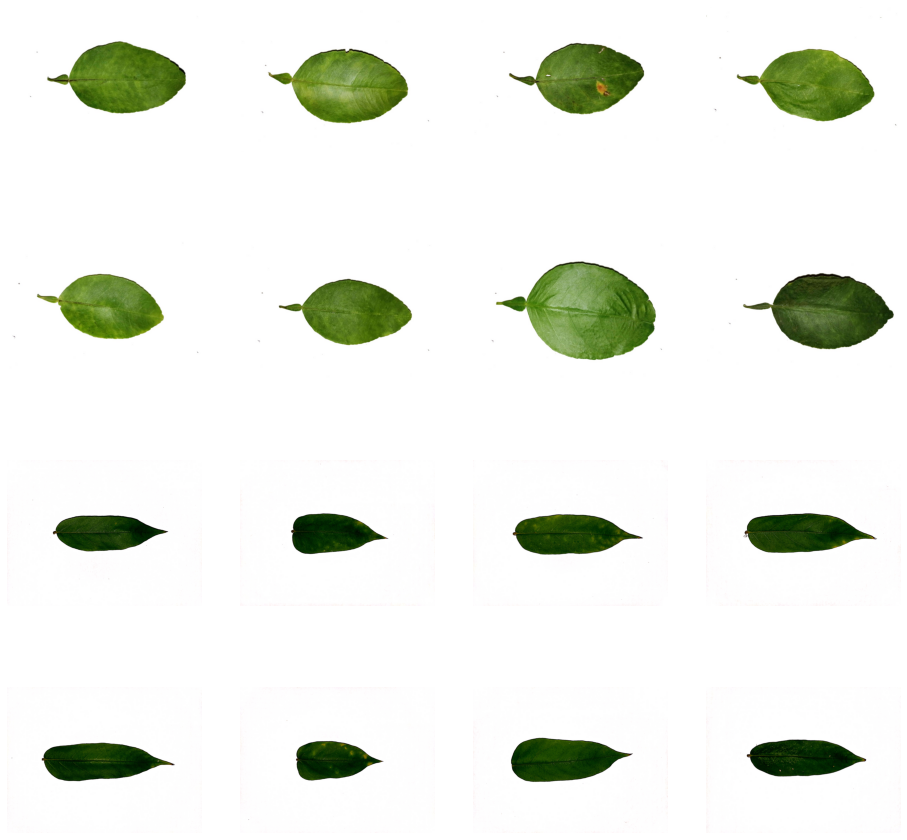

In [46]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_jeruknipis_dir, fname) 
                for fname in os.listdir(train_jeruknipis_dir)[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_belimbing_wuluh_dir, fname) 
                for fname in os.listdir(train_belimbing_wuluh_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [75]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)
        if ".JPG" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [77]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)
        if ".JPG" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [78]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (80, 150, 150, 3)
Train Label =  (80,)
Validation Data =  (20, 150, 150, 3)
Validation Label =  (20,)


In [80]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [83]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[35:45])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[35:45])

Label sebelum di-encoder  ['jeruk_nipis' 'jeruk_nipis' 'jeruk_nipis' 'jeruk_nipis' 'jeruk_nipis'
 'belimbing_wuluh' 'belimbing_wuluh' 'belimbing_wuluh' 'belimbing_wuluh'
 'belimbing_wuluh']
Label setelah di-encoder  [1 1 1 1 1 0 0 0 0 0]


<h3>Definisikan Model</h3>

In [84]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [85]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [86]:
# Tampilkan model summary
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_3 (Flatten)         (None, 67500)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               8640128   
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [87]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [88]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
4/4 [==============================] - 1s 67ms/step - loss: 36.2060 - acc: 0.4500 - val_loss: 6.1430 - val_acc: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 38ms/step - loss: 3.0662 - acc: 0.7125 - val_loss: 0.0511 - val_acc: 0.9500
Epoch 3/50
4/4 [==============================] - 0s 35ms/step - loss: 1.0712e-04 - acc: 1.0000 - val_loss: 7.0254e-06 - val_acc: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 35ms/step - loss: 0.3327 - acc: 0.9500 - val_loss: 0.1720 - val_acc: 0.9500
Epoch 5/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0148 - acc: 0.9875 - val_loss: 1.0073e-11 - val_acc: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 44ms/step - loss: 2.4151e-08 - acc: 1.0000 - val_loss: 6.0773e-21 - val_acc: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 38ms/step - loss: 2.2705e-15 - acc: 1.0000 - val_loss: 2.0090e-17 - val_acc: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 36ms/step - los

<h3>Evaluasi Model</h3>

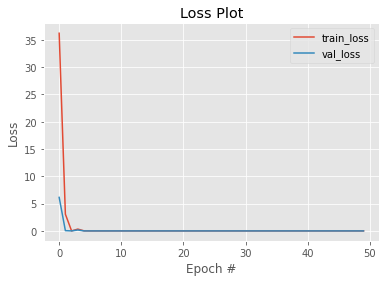

In [89]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

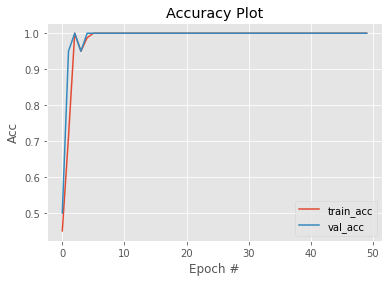

In [90]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [91]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

